In [4]:
from pylab import imshow
import numpy as np
import cv2
import torch
import albumentations as albu
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image
from people_segmentation.pre_trained_models import create_model

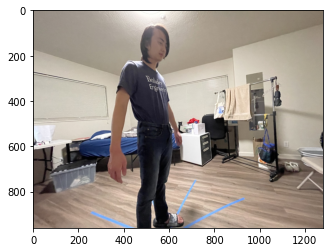

In [12]:
model = create_model("Unet_2020-07-20")
model.eval()
image = load_rgb("images/IMG_8178 Large.jpeg")
imshow(image)

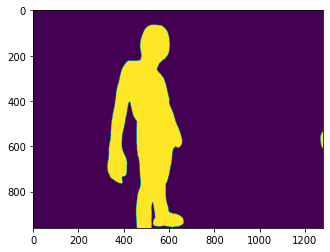

In [13]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)
with torch.no_grad():
    prediction = model(x)[0][0]
mask = (prediction > 0).cpu().numpy().astype(np.uint8)
mask = unpad(mask, pads)
imshow(mask)